In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv', parse_dates=[3])
customers = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
order_payments = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')

In [4]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
orders.groupby('customer_id')['order_id'].count()

customer_id
00012a2ce6f8dcda20d059ce98491703    1
000161a058600d5901f007fab4c27140    1
0001fd6190edaaf884bcaf3d49edf079    1
0002414f95344307404f0ace7a26f1d5    1
000379cdec625522490c315e70c7a9fb    1
                                   ..
fffecc9f79fd8c764f843e9951b11341    1
fffeda5b6d849fbd39689bb92087f431    1
ffff42319e9b2d713724ae527742af25    1
ffffa3172527f765de70084a7e53aae8    1
ffffe8b65bbe3087b653a978c870db99    1
Name: order_id, Length: 99441, dtype: int64

In [6]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object

In [7]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
orders_cols = ['customer_id', 'order_purchase_timestamp', 'order_id']
new_orders = orders[orders_cols]

In [10]:
new_orders.head(5)

,customer_id,order_purchase_timestamp,order_id
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,949d5b44dbf5de918fe9c16f97b45f8a
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,ad21c59c0840e6cb83a9ceb5573f8159


In [11]:
same_purchase_time_df = pd.concat(_id for _, _id in new_orders.groupby('order_purchase_timestamp') if len(_id) > 1)

In [12]:
same_purchase_time_df.head(5)

,customer_id,order_purchase_timestamp,order_id
12751,f6295486d5e27c0de0101b3f1b63b6d1,2017-01-08 19:27:22,46936461f0c4e3c80b9289ce5fc1682a
94965,b14e4569fdc3353689f16abb8b57dadc,2017-01-08 19:27:22,195416246665b8268100ef5fde9722b4
2937,0c6e74d3848e590888f197074ee1f5ff,2017-01-13 11:06:56,4fe2e8b329e56a00aba9b0136b46f00f
5642,ed7ef682569428c1afaf73b39a2f602b,2017-01-13 11:06:56,c5a468ae781ffb0ec6d36ae89fe512b0
21456,b629604bb4374da78155fb48fcc1ec4f,2017-01-14 23:05:01,ed2ea4498bcd56d90d461a23fa47ac56


In [13]:
new_orders = new_orders.set_index('customer_id') # uncomment late
# new_orders.drop_duplicates(inplace=True)

In [14]:
customers_cols = ['customer_id', 'customer_unique_id']
new_customers = customers[customers_cols]
new_customers = new_customers.set_index('customer_id')

payment = order_payments[['order_id', 'payment_value']]

# try to figure out later: in the order_payments df there are the same order id with
# different payment_value values
# pd.concat(g for _, g in payment.groupby('order_id') if len(g) > 1)

# payment = payment.set_index('order_id')

elog = pd.concat([new_customers, new_orders], axis=1, join='inner')
elog.reset_index(inplace=True)
elog['order_date'] = elog.order_purchase_timestamp.dt.date
elog = elog[['customer_unique_id', 'order_date', 'order_id']]
elog = elog.rename(columns={'customer_unique_id':'customer_id'})
elog = pd.merge(elog, payment, on='order_id')

elog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   customer_id    103886 non-null  object 
 1   order_date     103886 non-null  object 
 2   order_id       103886 non-null  object 
 3   payment_value  103886 non-null  float64
dtypes: float64(1), object(3)
memory usage: 4.0+ MB


In [15]:
elog.head()

,customer_id,order_date,order_id,payment_value
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16,00e7ee1b050b8499577073aeb2a297a1,146.87
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12,29150127e6685892b6eab3eec79f59c7,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19,b2059ed67ce144a36e2aa97d2c9e9ad2,157.73
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13,951670f92359f4fe4a63112aa7306eba,173.30
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29,6b7d50bd145f6fc7f33cebabd7e49d0f,252.25


In [17]:
elog.customer_id.describe()

count                               103886
unique                               96095
top       9a736b248f67d166d2fbb006bcb877c3
freq                                    33
Name: customer_id, dtype: object

In [18]:
elog.order_date.describe()

count         103886
unique           633
top       2017-11-24
freq            1214
Name: order_date, dtype: object

<AxesSubplot:xlabel='order_date'>

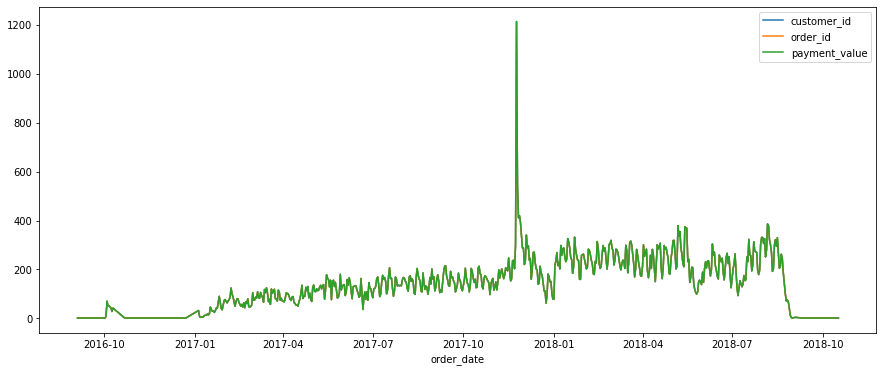

In [19]:
elog.groupby('order_date').count().plot(figsize=(15, 6))

In [20]:
print(f'The earliest order: {elog.order_date.min()}', \
      f'The latest order: {elog.order_date.max()}', sep='\n')

The earliest order: 2016-09-04
The latest order: 2018-10-17


In [21]:
!pip install lifetimes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 793.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.8 MB/s eta 0:00:00


In [22]:
from lifetimes.utils import summary_data_from_transaction_data
df_rfmt = summary_data_from_transaction_data(elog, 'customer_id', 'order_date', \
                                            'payment_value', observation_period_end='2018-06-30')
df_rfmt.head()

,frequency,recency,T,monetary_value
customer_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,51.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,54.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,477.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,261.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,228.0,0.0


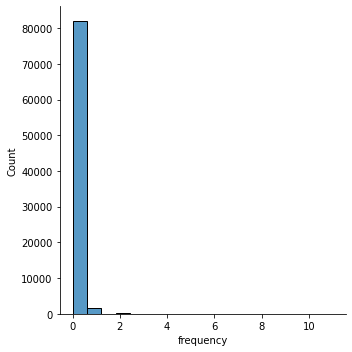

In [23]:
ax = sns.displot(df_rfmt['frequency'])

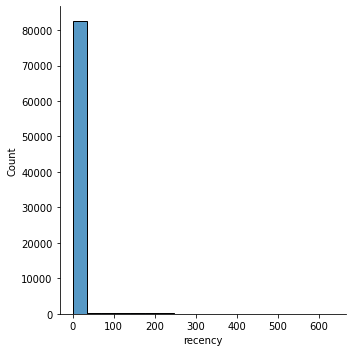

In [24]:
ax = sns.displot(df_rfmt['recency'])

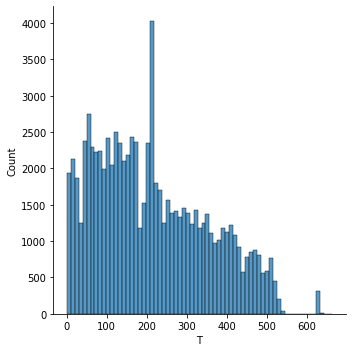

In [25]:
ax = sns.displot(df_rfmt['T'])

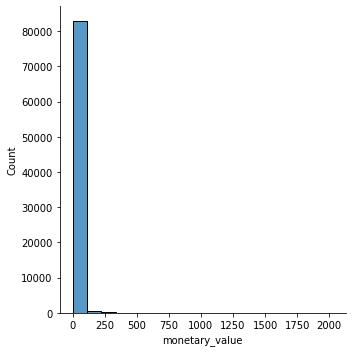

In [26]:
ax = sns.displot(df_rfmt['monetary_value'])

In [27]:
from lifetimes import ModifiedBetaGeoFitter

mbgf = ModifiedBetaGeoFitter(penalizer_coef=0.01)
mbgf.fit(df_rfmt['frequency'], \
        df_rfmt['recency'], \
        df_rfmt['T'], verbose=True)
mbgf.summary

Optimization terminated successfully.
         Current function value: 0.085065
         Iterations: 42
         Function evaluations: 43
         Gradient evaluations: 43


,coef,se(coef),lower 95% bound,upper 95% bound
r,0.098303,0.008211,0.082210,0.114396
alpha,218.096466,10.764063,196.998902,239.194030
a,0.220098,0.021596,0.177768,0.262427
b,0.116179,0.012207,0.092253,0.140105


<AxesSubplot:title={'center':'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

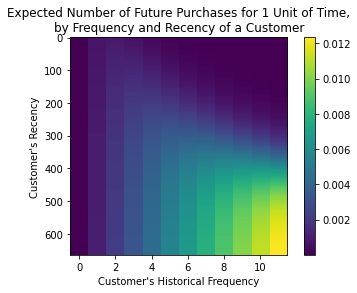

In [28]:
from lifetimes.plotting import plot_frequency_recency_matrix
plot_frequency_recency_matrix(mbgf)

<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

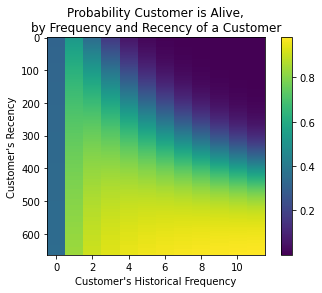

In [29]:
from lifetimes.plotting import plot_probability_alive_matrix

plot_probability_alive_matrix(mbgf)

# Predict the number of orders each customer will make during a time period

In [30]:
t = 90
df_rfmt['predicted_purchases'] = mbgf.conditional_expected_number_of_purchases_up_to_time(t, \
                                    df_rfmt['frequency'], df_rfmt['recency'], df_rfmt['T'])
df_rfmt.head()

,frequency,recency,T,monetary_value,predicted_purchases
customer_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,51.0,0.0,0.010902
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,54.0,0.0,0.010777
0000f46a3911fa3c0805444483337064,0.0,0.0,477.0,0.0,0.004030
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,261.0,0.0,0.005964
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,228.0,0.0,0.006429


In [31]:
df_rfmt.sort_values(by='predicted_purchases').tail(10)

,frequency,recency,T,monetary_value,predicted_purchases
customer_id,,,,,
397b44d5bb99eabf54ea9c2b41ebb905,3.0,157.0,170.0,489.963333,0.651429
f0e310a6839dce9de1638e0fe5ab282a,5.0,320.0,406.0,59.470000,0.663771
63cfc61cee11cbe306bff5857d00bfe4,5.0,382.0,415.0,135.432000,0.676203
de34b16117594161a6a89c50b289d35a,5.0,75.0,239.0,70.736000,0.695861
fe81bb32c243a86b2f86fbf053fe6140,4.0,242.0,251.0,381.745000,0.729295
3e43e6105506432c953e165fb2acf44c,5.0,162.0,285.0,214.788000,0.759443
6469f99c1f9dfae7733b25662e7f1782,5.0,282.0,284.0,133.412000,0.859878
1b6c7548a2a1f9037c1fd3ddfed95f33,6.0,93.0,229.0,151.143333,0.905591
ca77025e7201e3b30c44b472ff346268,6.0,235.0,264.0,138.941667,1.061578


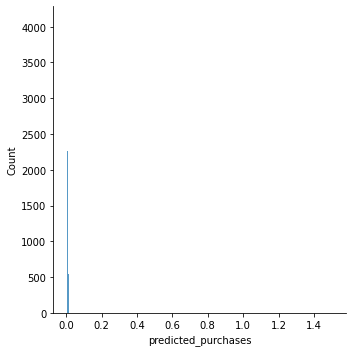

In [32]:
ax = sns.displot(df_rfmt['predicted_purchases'])

# Assessing model fit

<AxesSubplot:title={'center':'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

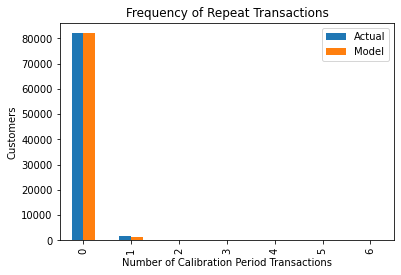

In [33]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(mbgf)

# Using a holdout group

In [34]:
calibration_period_ends = '2017-09-30'
from lifetimes.utils import calibration_and_holdout_data

cal_holdout_df = calibration_and_holdout_data(elog, 'customer_id', \
        'order_date', freq='D', calibration_period_end=calibration_period_ends, \
         observation_period_end='2018-09-28')
cal_holdout_df.head(3)

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
customer_id,,,,,
0000f46a3911fa3c0805444483337064,0.0,0.0,204.0,0.0,363.0
0005e1862207bf6ccc02e4228effd9a0,0.0,0.0,210.0,0.0,363.0
0006fdc98a402fceb4eb0ee528f6a8d4,0.0,0.0,74.0,0.0,363.0


<AxesSubplot:title={'center':'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

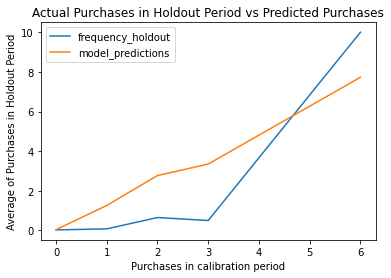

In [35]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

# refit the model on the calibration period data 
mbgf.fit(cal_holdout_df['frequency_cal'], cal_holdout_df['recency_cal'], \
        cal_holdout_df['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(mbgf, cal_holdout_df)

# Probability of being alive

In [36]:
# finding customers who made several orders in different days
df_3_or_more_orders = pd.concat(g for _, g in elog.groupby('customer_id') if len(set(g['order_date'])) > 3)
customer_id = df_3_or_more_orders.sample()['customer_id']

<AxesSubplot:title={'center':'History of P_alive'}, ylabel='P_alive'>

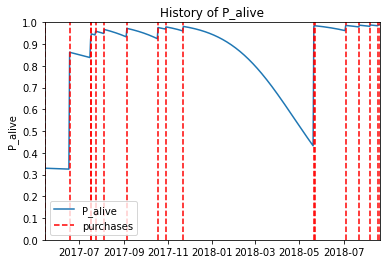

In [37]:
from lifetimes.plotting import plot_history_alive

days_since_birth = 200
customer_orders = elog[elog['customer_id'] == customer_id.values[0]]
plot_history_alive(mbgf, days_since_birth, customer_orders, 'order_date')

<AxesSubplot:title={'center':'History of P_alive'}, ylabel='P_alive'>

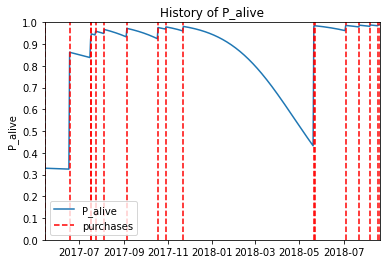

In [38]:
days_since_birth = 400
customer_orders = elog[elog['customer_id'] == customer_id.values[0]]
plot_history_alive(mbgf, days_since_birth, customer_orders, 'order_date')

# Predicting customer lifetime value

In [39]:
returning_customers = df_rfmt[(df_rfmt.frequency > 0) & (df_rfmt.monetary_value > 0)]
returning_customers.head(3)

,frequency,recency,T,monetary_value,predicted_purchases
customer_id,,,,,
004288347e5e88a27ded2bb23747066c,1.0,171.0,338.0,103.28,0.135514
004b45ec5c64187465168251cd1c9c2f,1.0,267.0,302.0,49.85,0.154180
0058f300f57d7b93c477a131a59b36c3,1.0,31.0,131.0,96.02,0.215107


the Gamma-Gamma model assumes that monetary value and frequency are independent 
variables and aren’t correlated with each other.

In [40]:
returning_customers[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,-0.000686
frequency,-0.000686,1.000000


In [41]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef=0.0)
ggf.fit(returning_customers['frequency'], returning_customers['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 1773 subjects, p: 5.71, q: 2.81, v: 48.81>

Average order value (AOV) tracks the average dollar amount spent each time a customer places an order on a website or mobile app

In [42]:
predicted_aov = ggf.conditional_expected_average_profit(
    returning_customers['frequency'], \
    returning_customers['monetary_value'])

In [43]:
aov_df = pd.DataFrame(predicted_aov, columns=['aov'])
aov_df.head()

,aov
customer_id,
004288347e5e88a27ded2bb23747066c,115.448510
004b45ec5c64187465168251cd1c9c2f,74.890601
0058f300f57d7b93c477a131a59b36c3,109.937553
00a39521eb40f7012db50455bf083460,57.378511
011575986092c30523ecb71ff10cb473,98.019920


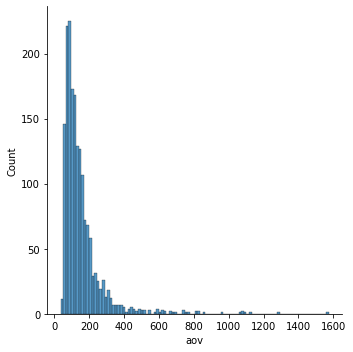

In [44]:
ax = sns.displot(aov_df['aov'])

# Segment customers by their AOV

In [48]:
aov_df['aov_bin'] = pd.qcut(aov_df['aov'], q=5, labels=[1, 2, 3, 4, 5])
aov_df = aov_df.reset_index()

In [53]:
aov_df.groupby('aov_bin').agg(
    count=('customer_id', 'count'),
    max_aov=('aov', max),
    min_aov=('aov', min),
    std=('aov', 'std'),
    aov=('aov', 'mean')
)

,count,max_aov,min_aov,std,aov
aov_bin,,,,,
1,355,78.830252,35.759870,7.908872,66.584464
2,355,104.267189,78.860615,7.213218,90.172498
3,354,138.236240,104.274780,9.946892,119.927904
4,354,191.205188,138.274194,15.275448,161.357705
5,355,1575.366234,191.212779,186.247788,325.544671


In [58]:
from sklearn.cluster import KMeans

aov_clusters = aov_df[['aov']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(aov_clusters)

aov_clusters = aov_clusters.assign(cluster=kmeans.labels_)
aov_clusters.groupby('cluster')['aov'].mean().sort_values(ascending=False).to_frame()

,aov
cluster,
4,1159.923784
1,625.423976
2,312.380107
0,169.422533
3,88.343364


# Predicting Customer LifeTime Value

In [63]:
mbgf.fit(returning_customers['frequency'], returning_customers['recency'], \
         returning_customers['T'])

<lifetimes.ModifiedBetaGeoFitter: fitted with 1773 subjects, a: 0.00, alpha: 544.57, b: 0.00, r: 2.39>

In [68]:
predictions = ggf.customer_lifetime_value(
    mbgf,
    returning_customers['frequency'],
    returning_customers['recency'],
    returning_customers['T'],
    returning_customers['monetary_value'], 
    time = 12,
    discount_rate = 0.01
)
predictions = predictions.to_frame().reset_index()

In [72]:
predictions.sort_values(by='clv', ascending=False).head(7)

,customer_id,clv
7,012a218df8995d3ec3bb221828360c86,2152.239409
1126,a1044dd75b74fbc485b040575a14acf0,1979.837004
34,055ec572ac7f3c7bdd04a183830ebe59,1953.924422
21,0341bbd5c969923a0f801b9e2d10a7b8,1689.070672
493,4711348768db55c57a67aba080ead566,1603.169013
628,58c1b085b54c03a1f1ab5f13d64c2b1c,1492.169189
1319,bf1dd33f93c58ea45d677d7e871e098e,1403.500809


In [73]:
predictions.sort_values(by='clv', ascending=False).tail(7)

,customer_id,clv
531,4c3d123168c78dcca6cde5a7274430a5,62.666797
1663,ed873efbae1f165689d2e836f7a45a20,61.216063
586,53100f780630b0755dcdec40f673abfb,58.746287
206,1c4531b533d17f3b316de441268e513c,58.137099
201,1b6e96ed99cb8d135efe220d761bbd67,57.219796
938,87a7c3090f96d9da963125a0d7f8193a,56.564165
1726,f7b981e8a280e455ac3cbe0d5d171bd1,54.045320
